# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2023-06-26 08:17:38--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2023-06-26 08:17:38--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 142.250.141.100, 142.250.141.139, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6kf5ijeu3lrd9qd9oo3ninnjrsdtk9tj/1687767450000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=0df67634-3f6f-4fad-b8b0-9eb2b0dce9f9 [following]
--2023-06-26 08:17:39--  https://doc-10-10-doc

In [2]:
# 라이브러리 및 데이터 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# VIF기능을 제공하는 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn 의 MinMaxScaler 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

# 데이터를 불러와 학습시킬 준비하기

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.drop('index',axis = 1, inplace = True)
test.drop('index',axis = 1, inplace = True)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 👋 실습
---







## EDA

In [3]:
import seaborn as sns

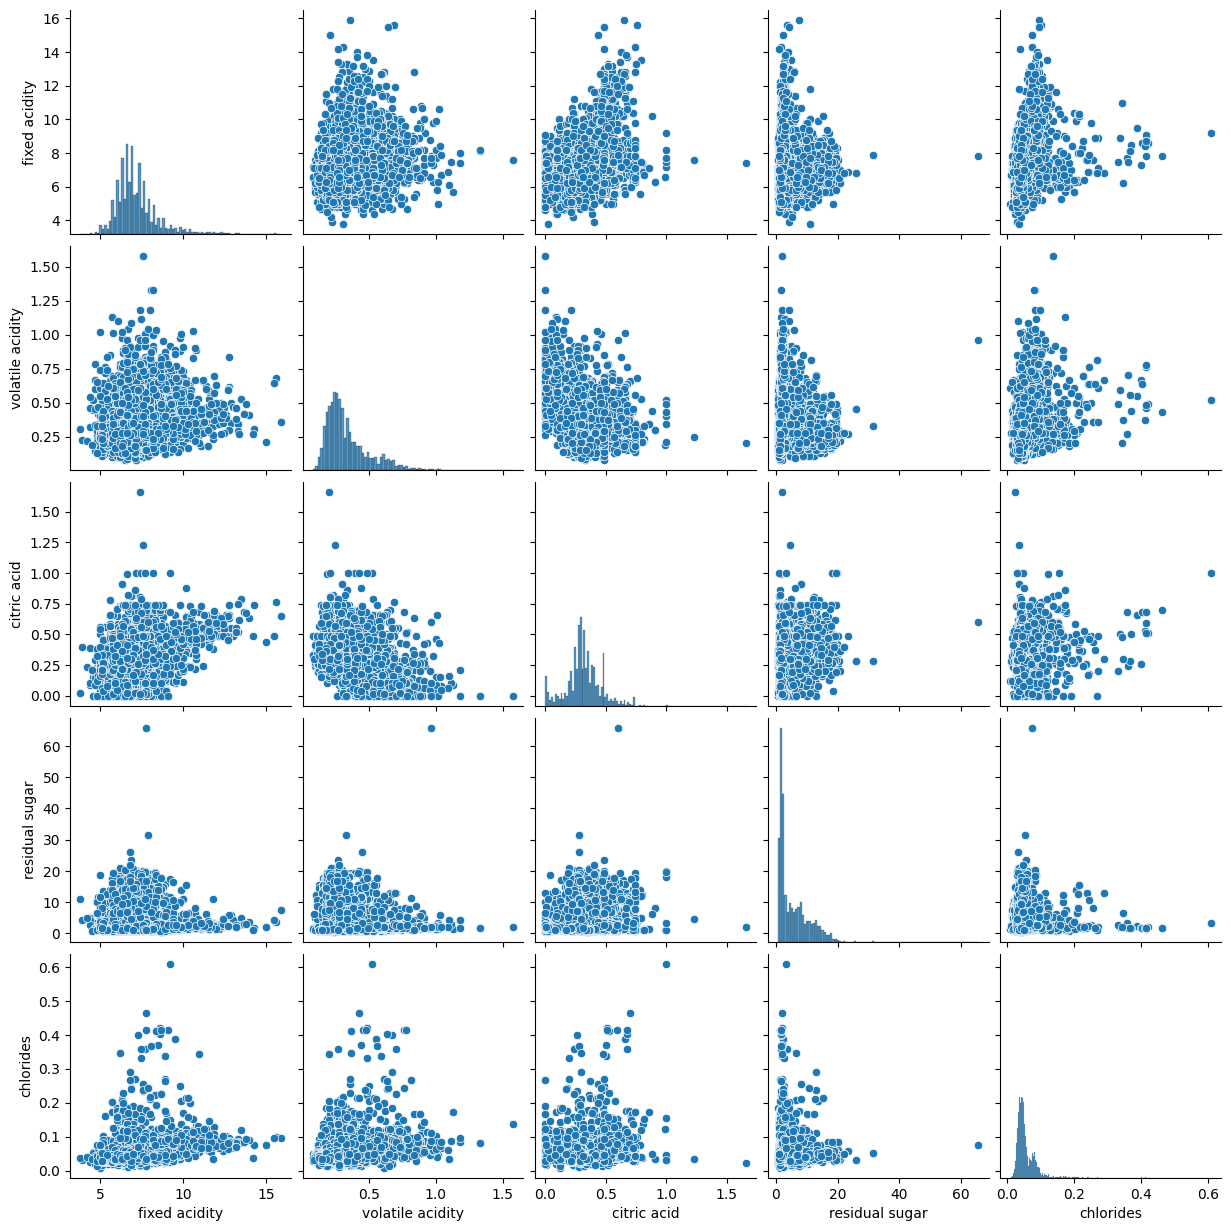

In [7]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요
data = train.loc[:,'fixed acidity':'chlorides']

# data의 pairplot을 그려보세요
sns.pairplot(data)

<ipython-input-8-b998a880b1c6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins = 100)


<Axes: xlabel='fixed acidity', ylabel='Density'>

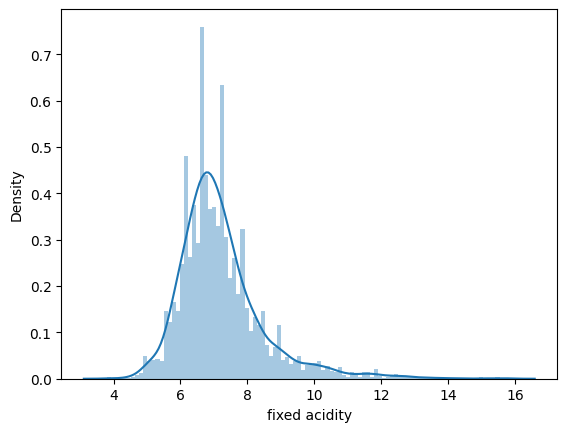

In [8]:
# "data"라는 변수에 train의 "fixed acidity" 변수를 저장해주세요
data = train['fixed acidity']
# data의 distplot을 그려보세요(bins = 100)

sns.distplot(data, bins = 100)

<Axes: >

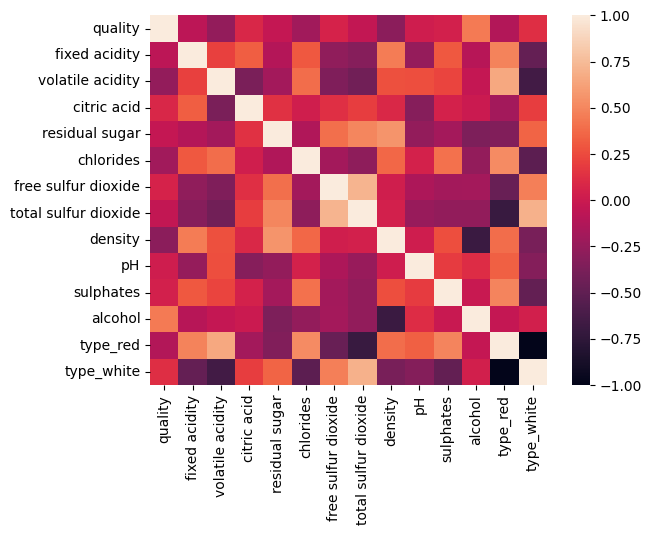

In [9]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )
# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.
data = train.corr()

# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.
sns.heatmap(data)


<Axes: xlabel='residual sugar', ylabel='density'>

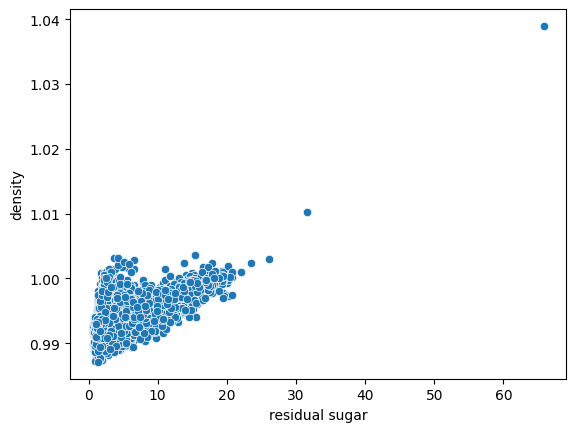

In [11]:
# Scatter Plot을 그릴 변수 지정 (x = residual sugar, y = density)
x = train['residual sugar']
y = train['density']

# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.
sns.scatterplot(x=x,y=y)


## 전처리

In [12]:
# train 데이터의 VIF 계수 출력
VIF = pd.DataFrame()

VIF['VIF Factor'] = [ variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
VIF['feature'] = train.columns



# MinMaxScaler를 통해 변수 변환
scaler = MinMaxScaler()

scaler.fit(train)

train_scale = scaler.transform(train)


# Sclaer 를 통해 변환된 데이터의 VIF 확인
new_d = pd.DataFrame(train_scale)
new_d.columns = train.columns

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(new_d.values, i) for i in range(new_d.shape[1])]

In [13]:
import matplotlib.pyplot as plt

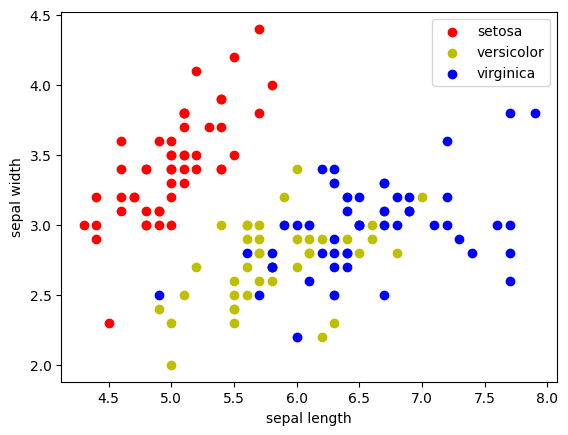

[[-6.30702931e-01  1.07577910e-01]
 [-6.22904943e-01 -1.04259833e-01]
 [-6.69520395e-01 -5.14170597e-02]
 [-6.54152759e-01 -1.02884871e-01]
 [-6.48788056e-01  1.33487576e-01]
 [-5.35272778e-01  2.89615724e-01]
 [-6.56537790e-01  1.07244911e-02]
 [-6.25780499e-01  5.71335411e-02]
 [-6.75643504e-01 -2.00703283e-01]
 [-6.45644619e-01 -6.72080097e-02]
 [-5.97408238e-01  2.17151953e-01]
 [-6.38943190e-01  3.25988375e-02]
 [-6.61612593e-01 -1.15605495e-01]
 [-7.51967943e-01 -1.71313322e-01]
 [-6.00371589e-01  3.80240692e-01]
 [-5.52157227e-01  5.15255982e-01]
 [-5.77053593e-01  2.93709492e-01]
 [-6.03799228e-01  1.07167941e-01]
 [-5.20483461e-01  2.87627289e-01]
 [-6.12197555e-01  2.19140388e-01]
 [-5.57674300e-01  1.02109180e-01]
 [-5.79012675e-01  1.81065123e-01]
 [-7.37784662e-01  9.05588211e-02]
 [-5.06093857e-01  2.79470846e-02]
 [-6.07607579e-01  2.95285112e-02]
 [-5.90210587e-01 -9.45510863e-02]
 [-5.61527888e-01  5.52901611e-02]
 [-6.08453780e-01  1.18310099e-01]
 [-6.12617807e-01  8

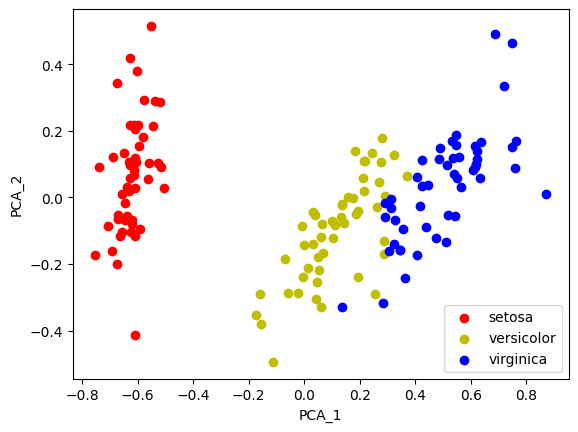

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

# 사이킷런 내장 데이터 셋 API 호출

iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns =  ['sepal_length','sepal_width','petal_length','petal_width']
df['target']=iris.target
df.head(3)

#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color = ['r','y','b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2.

# 각 target 별로 다른 색으로 scatter plot
for i, c in enumerate(color):
    x_data = df[df['target']==i]['sepal_length']
    y_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_data, y_data,color = c,label=iris.target_names[i])

plt.legend()

plt.xlabel('sepal length')

plt.ylabel('sepal width')

plt.show()



# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환

# 'sepal_length','sepal_width','petal_length','petal_width'
df_feature = df[['sepal_length','sepal_width','petal_length','petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_feature)




# PCA를 이용하여 4차원 변수를 2차원으로 변환
pca = PCA(n_components=2)



#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환
pca.fit(df_scaler)

df_pca =  pca.transform(df_scaler)

print(df_pca)



# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정


df_pca = pd.DataFrame(df_pca)

df_pca.columns = ['PCA_1','PCA_2']

df_pca['target']=df.target

df_pca.head(3)



#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2.

# 각 target 별로 다른 색으로 scatter plot

for i, c in enumerate(color):

    x_axis_data = df_pca[df_pca['target']==i]['PCA_1']

    y_axis_data = df_pca[df_pca['target']==i]['PCA_2']

    plt.scatter(x_axis_data, y_axis_data, color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('PCA_1')

plt.ylabel('PCA_2')

plt.show()

In [20]:
 # train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환

 train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)


In [22]:
from sklearn.preprocessing import PolynomialFeatures
 # train 데이터를 PolynomialFeatures 를 이용하여 변환

poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정



# 와인 품질 기준인 quality 변수를 제외한 나머지 변수를 포함한 데이터 변환.

df = train.drop('quality',axis = 1)

df_poly = poly_features.fit_transform(df) # fit_transform 메소드를 통해 데이터 변환

df_poly = pd.DataFrame(df_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환



# DecisionTreeClassifier 모델을 변환된 train 데이터로 학습



from sklearn.tree import DecisionTreeClassifier



model = DecisionTreeClassifier()

model.fit(df_poly,train['quality'])



# test 데이터 변환



poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정



test_poly = poly_features.fit_transform(test) # fit_transform 메소드를 통해 데이터 변환

test_poly = pd.DataFrame(test_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환



# 결괏값 추론

pred = model.predict(test_poly)



# 정답 파일 생성

submission = pd.read_csv('data/sample_submission.csv')

submission['quality'] = pred

submission.to_csv('poly.csv',index = False)

## 모델링 및 튜닝


### Random forest 튜닝

In [29]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['quality'], axis = 1)

y = train['quality']



# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):

  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),
              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요

BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_rf.maximize(init_points = 5, n_iter = 5)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.5382    | 2.098     | 80.06     |
| 2         | 0.5236    | 2.206     | 68.14     |
| 3         | 0.52      | 1.847     | 75.21     |
| 4         | 0.4718    | 1.875     | 92.42     |
| 5         | 0.5373    | 2.927     | 56.84     |
| 6         | 0.4545    | 1.0       | 51.55     |
| 7         | 0.5118    | 2.032     | 78.79     |
| 8         | 0.4845    | 2.335     | 81.58     |
| 9         | 0.5064    | 2.027     | 79.63     |
| 10        | 0.4909    | 2.089     | 87.6      |


### xgb 튜닝

In [32]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['quality'])

y = train['quality']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# XGBoost의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 XGBoost hyperparameter이름이고, value는 탐색할 범위 입니다.

xgb_parameter_bounds = {
                      'gamma' : (0,10),
                      'max_depth' : (1,3),
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def xgb_bo(gamma,max_depth, subsample):

  xgb_params = {
              'gamma' : int(round(gamma)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),
              }

  xgb = XGBClassifier(**xgb_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  xgb.fit(X_train,y_train)
  score = accuracy_score(y_valid, xgb.predict(X_valid))
  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_xgb.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   |   gamma   | max_depth | subsample |
-------------------------------------------------------------
| 1         | 0.5491    | 5.488     | 2.43      | 0.8014    |
| 2         | 0.54      | 5.449     | 1.847     | 0.8229    |
| 3         | 0.5773    | 4.376     | 2.784     | 0.9818    |
| 4         | 0.5673    | 3.834     | 2.583     | 0.7644    |
| 5         | 0.55      | 5.68      | 2.851     | 0.5355    |
| 6         | 0.002727  | 4.419     | 3.0       | 0.5       |
| 7         | 0.5827    | 2.303     | 2.915     | 0.6916    |
| 8         | 0.5591    | 5.411     | 2.106     | 0.8663    |
| 9         | 0.5845    | 2.285     | 2.978     | 0.7295    |
| 10        | 0.52      | 3.72      | 1.231     | 0.9286    |


### LGBM 튜닝

In [34]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['quality'])

y = train['quality']



# LGBM의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 LGBM hyperparameter이름이고, value는 탐색할 범위 입니다.

lgbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def lgbm_bo(n_estimators,max_depth, subsample):

  lgbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),
              }

  lgbm = LGBMClassifier(**lgbm_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  lgbm.fit(X_train,y_train)

  score = accuracy_score(y_valid, lgbm.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_lgbm"라는 변수에 Bayesian Optmization을 저장해보세요

BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_lgbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... | subsample |
-------------------------------------------------------------
| 1         | 0.5582    | 2.098     | 80.06     | 0.8014    |
| 2         | 0.5418    | 2.09      | 59.66     | 0.8229    |
| 3         | 0.5473    | 1.875     | 92.42     | 0.9818    |
| 4         | 0.5709    | 1.767     | 85.42     | 0.7644    |
| 5         | 0.5636    | 2.136     | 94.79     | 0.5355    |
| 6         | 0.5718    | 2.338     | 79.72     | 0.9232    |
| 7         | 0.5655    | 2.049     | 94.82     | 0.5995    |
| 8         | 0.5591    | 2.026     | 94.78     | 0.6026    |
| 9         | 0.5718    | 2.432     | 79.74     | 0.9779    |
| 10        | 0.5545    | 1.744     | 38.08     | 0.9286    |


### voting classifier 정의 및 예측

In [37]:
# 모델 정의 (튜닝된 파라미터로)
LGBM = LGBMClassifier(max_depth = 2,n_estimators=60, subsample = 0.8229)
XGB = XGBClassifier(gamma =  4.376, max_depth = 3, subsample = 0.9818)
RF = RandomForestClassifier(max_depth = 3, n_estimators = 35)

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

X = train.drop('quality',axis= 1)
y = train['quality']



# fit 메소드를 이용해 모델 학습

VC.fit(X,y)

# predict 메소드와 test_one 데이터를 이용해 품질 예측

pred = VC.predict(test)

# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.head()

submission.to_csv('tune_voting.csv',index=False)

In [38]:
submission.to_csv('tune_voting.csv',index=False)

# 정답

In [ ]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train.loc[:, 'fixed acidity' : 'chlorides']

# data의 pairplot을 그려보세요

sns.pairplot(data)

In [ ]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train['fixed acidity']

# data의 pairplot을 그려보세요

sns.distplot(data,bins = 100)

In [ ]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )

# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.

data = train.corr()



# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.

sns.heatmap(data)

In [ ]:
# Scatter Plot을 그릴 변수 지정 (

x_data = train['residual sugar']

y_data = train['density']



# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.

sns.scatterplot(x = x_data, y = y_data )

In [ ]:
# train 데이터의 VIF 계수 출력



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

vif["features"] = train.columns




# MinMaxScaler를 통해 변수 변환

scaler = MinMaxScaler()

scaler.fit(train) # fit 함수를 이용해  scaler 학습

train_scale = scaler.transform(train)# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.





# Sclaer 를 통해 변환된 데이터의 VIF 확인

new_train_df =  pd.DataFrame(train_scale)

new_train_df.columns = train.columns



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]

vif["features"] = new_train_df.columns


In [ ]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2.

# 각 target 별로 다른 색으로 scatter plot

for i, c in enumerate(color):

    x_axis_data = df[df['target']==i]['sepal_length']

    y_axis_data = df[df['target']==i]['sepal_width']

    plt.scatter(x_axis_data, y_axis_data,color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('sepal length')

plt.ylabel('sepal width')

plt.show()



# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환

# 'sepal_length','sepal_width','petal_length','petal_width'

df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]

df_scaler = MinMaxScaler().fit_transform(df_features)



# PCA를 이용하여 4차원 변수를 2차원으로 변환



pca = PCA(n_components=2)



#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환

pca.fit(df_scaler)

df_pca = pca.transform(df_scaler)

print(df_pca.shape)



# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정



df_pca = pd.DataFrame(df_pca)

df_pca.columns = ['PCA_1','PCA_2']

df_pca['target']=df.target

df_pca.head(3)



#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2.

# 각 target 별로 다른 색으로 scatter plot

for i, c in enumerate(color):

    x_axis_data = df_pca[df_pca['target']==i]['PCA_1']

    y_axis_data = df_pca[df_pca['target']==i]['PCA_2']

    plt.scatter(x_axis_data, y_axis_data, color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('PCA_1')

plt.ylabel('PCA_2')

plt.show()

In [ ]:
 # train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환

 train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)

In [ ]:
 # train 데이터를 PolynomialFeatures 를 이용하여 변환



poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정



# 와인 품질 기준인 quality 변수를 제외한 나머지 변수를 포함한 데이터 변환.

df = train.drop('quality',axis = 1)

df_poly = poly_features.fit_transform(df) # fit_transform 메소드를 통해 데이터 변환

df_poly = pd.DataFrame(df_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환



# DecisionTreeClassifier 모델을 변환된 train 데이터로 학습



from sklearn.tree import DecisionTreeClassifier



model = DecisionTreeClassifier()

model.fit(df_poly,train['quality'])



# test 데이터 변환



poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정



test_poly = poly_features.fit_transform(test) # fit_transform 메소드를 통해 데이터 변환

test_poly = pd.DataFrame(test_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환



# 결괏값 추론

pred = model.predict(test_poly)



# 정답 파일 생성

submission = pd.read_csv('data/sample_submission.csv')

submission['quality'] = pred

submission.to_csv('poly.csv',index = False)

## 모델링 및 튜닝

In [ ]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):

  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),
              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요

BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_rf.maximize(init_points = 5, n_iter = 5)


In [ ]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# XGBoost의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 XGBoost hyperparameter이름이고, value는 탐색할 범위 입니다.

xgb_parameter_bounds = {
                      'gamma' : (0,10),
                      'max_depth' : (1,3),
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def xgb_bo(gamma,max_depth, subsample):

  xgb_params = {
              'gamma' : int(round(gamma)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),
              }

  xgb = XGBClassifier(**xgb_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  xgb.fit(X_train,y_train)
  score = accuracy_score(y_valid, xgb.predict(X_valid))
  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_xgb.maximize(init_points = 5, n_iter = 5)

In [ ]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# LGBM의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 LGBM hyperparameter이름이고, value는 탐색할 범위 입니다.

lgbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def lgbm_bo(n_estimators,max_depth, subsample):

  lgbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),
              }

  lgbm = LGBMClassifier(**lgbm_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  lgbm.fit(X_train,y_train)

  score = accuracy_score(y_valid, lgbm.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_lgbm"라는 변수에 Bayesian Optmization을 저장해보세요

BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_lgbm.maximize(init_points = 5, n_iter = 5)

In [ ]:
# 모델 정의 (튜닝된 파라미터로)
LGBM = LGBMClassifier(max_depth = 2,n_estimators=60, subsample = 0.8229)
XGB = XGBClassifier(gamma =  4.376, max_depth = 3, subsample = 0.9818)
RF = RandomForestClassifier(max_depth = 3, n_estimators = 35)

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

X = train_one.drop('quality',axis= 1)
y = train_one['quality']



# fit 메소드를 이용해 모델 학습

VC.fit(X,y)

# predict 메소드와 test_one 데이터를 이용해 품질 예측

pred = VC.predict(test_one)

# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.head()

submission.to_csv('tune_voting.csv',index=False)

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)